In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from sklearn.model_selection import train_test_split

from load_data import try_PCA, load_data
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer,StandardScaler,MinMaxScaler


In [2]:
def dnn_model_after_pca(input_shape = [150, 543, 3]):
    model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(31, activation = 'softmax')
    ])
    learning_rate = 0.001
    momentum = 0.9
    sgd = tf.keras.optimizers.SGD(lr=learning_rate, momentum=momentum,  nesterov=False)
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])
    return model

In [3]:
model = dnn_model_after_pca()

C:\Users\user\anaconda3\envs\cudatry\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [3]:
def train(x,y):
    from sklearn.preprocessing import LabelBinarizer
    encoder = LabelBinarizer()

    transfomed_label = encoder.fit_transform(y)
    y = transfomed_label.argmax(1)
    y = np.array(y).astype(float)
    (train_x, test_x, train_y, test_y) = train_test_split(
	                                                    x,y, test_size=0.2, random_state=42)
    print(x.shape)
    model = dnn_model_after_pca()
    #tf.config.list_physical_devices('GPU')
    print(tf.test.is_gpu_available())
    print(model.summary())
    
    history = model.fit(train_x, train_y, epochs=100)
    
    print(model.evaluate(test_x,test_Y))
    return history,model


In [4]:

def y_lable_encode(y):
    # y label encoder
    encoder = LabelBinarizer()

    transfomed_label = encoder.fit_transform(y)
    y = transfomed_label.argmax(1)
    y = np.array(y).astype(float)

    return y

In [5]:
x,y = try_PCA(0.9)
y = y_lable_encode(y)
y[:10]

(915, 19)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
x,y = load_data()

In [16]:
#x = x.reshape((915,-1))
x.shape, len(y)

((915, 150, 543, 3), 915)

In [23]:
model = dnn_model_after_pca((244350,))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 244350)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               31276928  
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1950      
Total params: 31,287,134
Trainable params: 31,287,134
Non-trainable params: 0
_________________________________________________________________


In [83]:
y = y_lable_encode(y)
y[:10]
#model.fit(x,y,epochs=100)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [48]:

    (train_x, test_x, train_y, test_y) = train_test_split(
	                                                    x,y, test_size=0.2, random_state=42)
    train_x.shape

(732, 19)

In [41]:
model = dnn_model_after_pca()
#tf.config.list_physical_devices('GPU')
print("is gpu available?",tf.test.is_gpu_available())
print(model.summary())

is gpu available? True
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 19)                380       
_________________________________________________________________
dense_11 (Dense)             (None, 128)               2560      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 30)                1950      
Total params: 13,146
Trainable params: 13,146
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
from tensorflow import keras
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [ ]:
train(x,y)

In [53]:
model.fit(x,y,)

29/29 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0328


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x))
x = scaler.transform(x)
x.shape

StandardScaler()


(915, 19)

In [51]:
model.fit(x,y,batch_size=32 ,epochs=10)

Epoch 1/10
29/29 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0306
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0306
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0306
Epoch 4/10
29/29 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0306
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0306
Epoch 6/10
29/29 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0306
Epoch 7/10
29/29 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0306
Epoch 8/10
29/29 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0306
Epoch 9/10
29/29 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0306
Epoch 10/10
29/29 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0306


In [77]:
y = y.astype(float)
y

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6

In [47]:
x.shape

(915, 19)

In [49]:
# loss nan reason
# 1. do input values have nan value? -> NO!
np.sum(np.isnan(x))
# 2. 

0

In [6]:
# TensorFlow and tf.keras
import tensorflow as tf
from sklearn.model_selection import train_test_split

from load_data import try_PCA, load_data
from sklearn.decomposition import PCA

In [7]:
x,y = load_data()

In [8]:
from sklearn.manifold import TSNE
pca = PCA(n_components=0.95)
x = x.reshape((x.shape[0],-1))
x = pca.fit_transform(x)

In [9]:
x.shape

(915, 39)

In [23]:
x_embed = TSNE(n_components=2).fit_transform(x)

In [24]:
x_embed.shape

(915, 2)

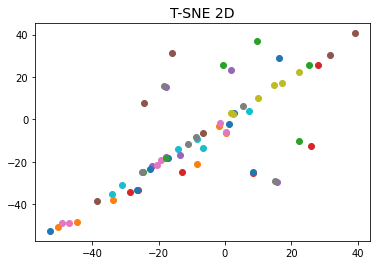

In [26]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
for i in set(y):
    condition = (np.array(y) == i)
    ax.scatter(x_embed[condition][0],x_embed[condition][1])

plt.title('T-SNE 2D', fontsize=14)
plt.savefig("T-SNE 2D.png")
plt.show()

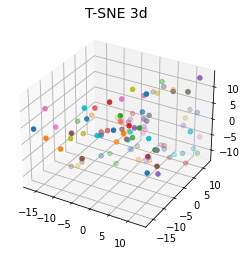

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
for i in set(y):
    condition = (np.array(y) == i)
    ax.scatter(x_embed[condition][0],x_embed[condition][1],x_embed[condition][2])

plt.title('T-SNE 3d', fontsize=14)
plt.savefig("T-SNE 3D.png")
plt.show()

In [7]:
import os
import glob
import pickle
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [10]:
def knn_classifier(train_x, test_x, train_y, test_y):
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(train_x,train_y)
    acc_test = model.score(test_x,test_y)
    print(confusion_matrix(test_y, model.predict(test_x)))
    print("knn classfier acc:",acc_test)
    return acc_test

def svm_classifier(train_x, test_x, train_y, test_y):
    from sklearn.svm import SVC
    clf =SVC(gamma='auto')
    clf.fit(train_x,train_y)
    acc = clf.score(test_x,test_y)
    print("svm_classifier acc",acc)
    return acc

In [11]:
x,y = try_PCA(0.9)
    #draw_plot(x,y)
    #draw_tsne(x,y)
y = np.array(y)
(train_x, test_x, train_y, test_y) = train_test_split(
                                                    x,y, test_size=0.2, random_state=42)
knn_acc = knn_classifier(train_x, test_x, train_y, test_y)
svm_acc = svm_classifier(train_x, test_x, train_y, test_y)


(915, 19)
[[0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 2 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [2 1 0 1 1 3 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 1 0 1 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 2 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 2 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 2 0 1 0 0 0 0 0 0]
 [0 1 0 0 2 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [2 0 0 0 0 0 0 0 0 1 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0

<BarContainer object of 2 artists>

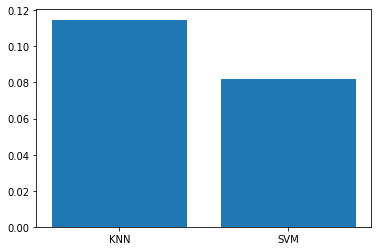

In [15]:
label = ['Thur', 'Fri']

index = np.arange(len(label))


plt.bar(["KNN","SVM"], [knn_acc,svm_acc])

In [25]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-labels-idx1-ubyte.gz: None -- [Errno 11001] getaddrinfo failed

In [26]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [27]:
x_train.shape

(60000, 28, 28)

In [33]:
model = dnn_model_after_pca((28,28))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_16 (Dense)             (None, 30)                1950      
Total params: 110,686
Trainable params: 110,686
Non-trainable params: 0
_________________________________________________________________


In [39]:
x_train.shape

(60000, 28, 28)

In [40]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [36]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 6489550.5000 - accuracy: 0.0969
Epoch 2/100
1875/1875 [==============================] - 3s 1ms/step - loss: 2.6045 - accuracy: 0.0989
Epoch 3/100
1875/1875 [==============================] - 3s 1ms/step - loss: 2.4817 - accuracy: 0.0974
Epoch 4/100
1875/1875 [==============================] - 3s 1ms/step - loss: 2.4272 - accuracy: 0.0989
Epoch 5/100
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3973 - accuracy: 0.0982
Epoch 6/100
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3786 - accuracy: 0.0993
Epoch 7/100
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3660 - accuracy: 0.0980
Epoch 8/100
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3569 - accuracy: 0.0978
Epoch 9/100
   1/1875 [..............................] - ETA: 1s - loss: 2.3523 - accuracy: 0.1562

KeyboardInterrupt: 

In [41]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
x_train = x_train/255.
history = model.fit(x_train, y_train, epochs=30)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7042 - accuracy: 0.7701
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4761 - accuracy: 0.8354
Epoch 3/30
1778/1875 [======================

KeyboardInterrupt: 

In [86]:
x,y=load_data()

In [87]:
x.shape

(915, 150, 543, 3)

In [111]:

# scaler = Normalizer()
# print(scaler.fit(x.reshape((915,-1))))
# x = scaler.transform(x.reshape((915,-1)))
# x.shape
# y = y_lable_encode(y)
# y[:10]

In [89]:
x.shape

(915, 244350)

In [90]:
model = dnn_model_after_pca(x.shape[1:])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 244350)            0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               31276928  
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_23 (Dense)             (None, 30)                1950      
Total params: 31,287,134
Trainable params: 31,287,134
Non-trainable params: 0
_________________________________________________________________


In [91]:
x.shape,y.shape
model.fit(x,y,epochs=100)

Epoch 1/100
29/29 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0306
Epoch 2/100
29/29 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0306
Epoch 3/100
29/29 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.0306
Epoch 4/100
29/29 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0306
Epoch 5/100
29/29 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0306
Epoch 6/100
29/29 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0306
Epoch 7/100
29/29 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0306
Epoch 8/100
29/29 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0306
Epoch 9/100
29/29 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0306
Epoch 10/100
29/29 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0306
Epoch 11/100
29/29 [=========

KeyboardInterrupt: 

In [64]:
x,y = try_PCA(0.9)

(915, 19)


(array([1.00000000e+01, 3.90000000e+01, 8.10000000e+01, 9.00000000e+01,
        1.35000000e+02, 2.69000000e+02, 3.37000000e+02, 5.62000000e+02,
        9.18000000e+02, 1.26700000e+03, 1.57700000e+03, 2.16100000e+03,
        2.75100000e+03, 3.38300000e+03, 4.13800000e+03, 5.26400000e+03,
        6.67300000e+03, 8.92100000e+03, 1.12300000e+04, 1.30720000e+04,
        1.57340000e+04, 1.61870000e+04, 1.76760000e+04, 1.94300000e+04,
        2.18250000e+04, 2.56420000e+04, 2.82300000e+04, 3.03340000e+04,
        3.46220000e+04, 3.85310000e+04, 4.50530000e+04, 5.13100000e+04,
        5.32170000e+04, 5.51410000e+04, 5.51230000e+04, 5.58970000e+04,
        5.39390000e+04, 4.83660000e+04, 4.06380000e+04, 3.53840000e+04,
        3.19900000e+04, 3.28730000e+04, 1.12776000e+05, 1.73680253e+08,
        6.91428600e+06, 2.31549000e+05, 4.17261000e+05, 2.43147500e+06,
        4.59088400e+06, 5.83788300e+06, 4.31265700e+06, 2.60129700e+06,
        4.76430100e+06, 9.33493900e+06, 4.54367700e+06, 1.082120

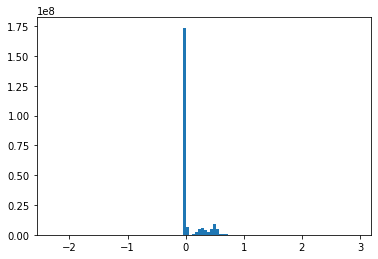

In [113]:
x,y=load_data()
x = x.reshape(-1)
plt.hist(x, bins=100)

(915, 150, 543, 3)
Normalizer()


(array([1.23786250e+07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.61248788e+08, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

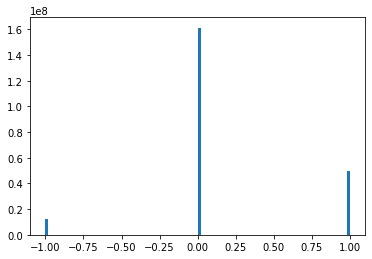

In [110]:
x,y=load_data()
print(x.shape)
x = x.reshape((-1,1))
scaler = Normalizer()
print(scaler.fit(x))
x = scaler.transform(x)
plt.hist(x,bins=100)

Normalizer()


(array([1.23786250e+07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.61248788e+08, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

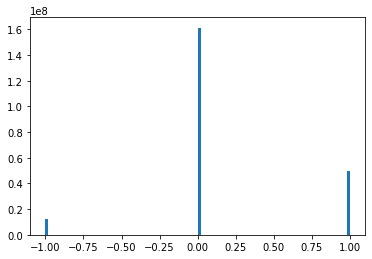

In [109]:
x,y=load_data()
print(x.shape)
x = x.reshape((-1,1))
scaler = Normalizer()
print(scaler.fit(x))
x = scaler.transform(x)
plt.hist(x,bins=100)

(915, 150, 543, 3)
MinMaxScaler()


(array([1.00000000e+01, 3.90000000e+01, 8.10000000e+01, 9.00000000e+01,
        1.35000000e+02, 2.69000000e+02, 3.37000000e+02, 5.62000000e+02,
        9.18000000e+02, 1.26700000e+03, 1.57700000e+03, 2.16100000e+03,
        2.75100000e+03, 3.38300000e+03, 4.13800000e+03, 5.26400000e+03,
        6.67300000e+03, 8.92100000e+03, 1.12300000e+04, 1.30720000e+04,
        1.57340000e+04, 1.61870000e+04, 1.76760000e+04, 1.94300000e+04,
        2.18250000e+04, 2.56420000e+04, 2.82300000e+04, 3.03340000e+04,
        3.46220000e+04, 3.85310000e+04, 4.50530000e+04, 5.13100000e+04,
        5.32170000e+04, 5.51410000e+04, 5.51230000e+04, 5.58970000e+04,
        5.39390000e+04, 4.83660000e+04, 4.06380000e+04, 3.53840000e+04,
        3.19900000e+04, 3.28730000e+04, 1.12776000e+05, 1.73680253e+08,
        6.91428600e+06, 2.31549000e+05, 4.17261000e+05, 2.43147500e+06,
        4.59088400e+06, 5.83788300e+06, 4.31265700e+06, 2.60129700e+06,
        4.76430100e+06, 9.33493900e+06, 4.54367700e+06, 1.082120

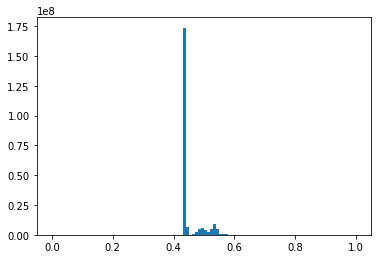

In [112]:
x,y=load_data()
print(x.shape)
x = x.reshape((-1,1))
scaler = MinMaxScaler()
print(scaler.fit(x))
x = scaler.transform(x)
plt.hist(x,bins=100)

(915, 150, 543, 3)
StandardScaler()


(array([1.00000000e+01, 3.90000000e+01, 8.10000000e+01, 9.00000000e+01,
        1.35000000e+02, 2.69000000e+02, 3.37000000e+02, 5.62000000e+02,
        9.18000000e+02, 1.26700000e+03, 1.57700000e+03, 2.16100000e+03,
        2.75100000e+03, 3.38300000e+03, 4.13800000e+03, 5.26400000e+03,
        6.67300000e+03, 8.92100000e+03, 1.12300000e+04, 1.30720000e+04,
        1.57340000e+04, 1.61870000e+04, 1.76760000e+04, 1.94300000e+04,
        2.18250000e+04, 2.56420000e+04, 2.82300000e+04, 3.03340000e+04,
        3.46220000e+04, 3.85310000e+04, 4.50530000e+04, 5.13100000e+04,
        5.32170000e+04, 5.51410000e+04, 5.51230000e+04, 5.58970000e+04,
        5.39390000e+04, 4.83660000e+04, 4.06380000e+04, 3.53840000e+04,
        3.19900000e+04, 3.28730000e+04, 1.12776000e+05, 1.73680253e+08,
        6.91428600e+06, 2.31549000e+05, 4.17261000e+05, 2.43147500e+06,
        4.59088400e+06, 5.83788300e+06, 4.31265700e+06, 2.60129700e+06,
        4.76430100e+06, 9.33493900e+06, 4.54367700e+06, 1.082120

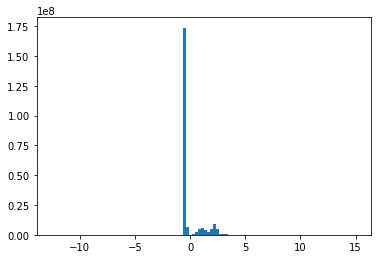

In [114]:
x,y=load_data()
print(x.shape)
x = x.reshape((-1,1))
scaler = StandardScaler()
print(scaler.fit(x))
x = scaler.transform(x)
plt.hist(x,bins=100)

In [116]:
x_train.shape

(60000, 28, 28)

(array([24381021.,   420255.,   136748.,   147646.,    89771.,   138729.,
           92605.,   141414.,    96118.,   146657.,   149805.,   101935.,
          155297.,   107043.,   162160.,   109666.,   165792.,   112395.,
          171260.,   109149.,   179542.,   176785.,   119526.,   181019.,
          118218.,   184824.,   122861.,   185361.,   125784.,   188813.,
          191328.,   129506.,   181042.,   142033.,   196207.,   133853.,
          200775.,   136216.,   202572.,   130030.,   212772.,   209782.,
          140880.,   214049.,   142665.,   219787.,   146296.,   223572.,
          149716.,   217217.,   234102.,   155073.,   232042.,   161376.,
          242059.,   164368.,   250530.,   170556.,   257831.,   166853.,
          277046.,   277285.,   189020.,   287310.,   198003.,   303499.,
          199547.,   320667.,   218674.,   335881.,   352209.,   235589.,
          367916.,   254956.,   388485.,   271366.,   417343.,   283752.,
          438654.,   293482.,   468939

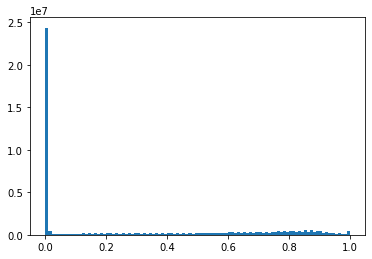

In [118]:
xx = x_train.reshape((-1))
plt.hist(xx,bins=100)

In [120]:
x_train.max()

1.0

In [121]:
x,y = try_PCA(0.9)

(915, 19)


In [122]:
x.shape

(915, 19)

(array([1.7300e+02, 2.8800e+02, 2.3690e+03, 1.1628e+04, 2.3600e+03,
        3.2700e+02, 1.3500e+02, 7.5000e+01, 2.4000e+01, 6.0000e+00]),
 array([-47.00763577, -33.65547637, -20.30331697,  -6.95115757,
          6.40100183,  19.75316123,  33.10532063,  46.45748004,
         59.80963944,  73.16179884,  86.51395824]),
 <BarContainer object of 10 artists>)

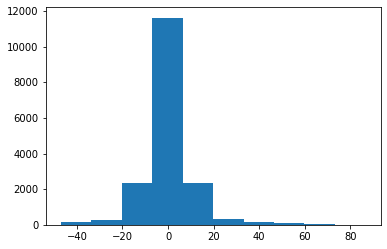

In [123]:
plt.hist(x.reshape(-1))

In [135]:
from sklearn.utils import shuffle
x,y = try_PCA(0.9)
y = y_lable_encode(y)
y[:10]
model = dnn_model_after_pca(x.shape[1:])
model.summary()
print(x.shape)
scaler = MinMaxScaler()
print(scaler.fit(x))
x = scaler.transform(x)

x,y = shuffle(x,y)
y[:10]
model.fit(x,y,epochs=10)

(915, 19)
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 19)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)               2560      
_________________________________________________________________
dense_52 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_53 (Dense)             (None, 30)                1950      
Total params: 12,766
Trainable params: 12,766
Non-trainable params: 0
_________________________________________________________________
(915, 19)
MinMaxScaler()
Epoch 1/10
29/29 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0317
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0306
Epoch 3/10
29/29 [====

(915, 19)
(915, 19)
StandardScaler()


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 4.000e+00, 3.000e+00, 6.000e+00, 3.000e+00, 1.000e+00,
        3.000e+00, 6.000e+00, 7.000e+00, 6.000e+00, 1.900e+01, 4.000e+01,
        5.200e+01, 8.000e+01, 1.310e+02, 2.050e+02, 3.120e+02, 4.640e+02,
        6.020e+02, 7.480e+02, 8.560e+02, 9.040e+02, 8.670e+02, 9.350e+02,
        9.420e+02, 9.740e+02, 1.044e+03, 9.200e+02, 8.740e+02, 9.110e+02,
        8.620e+02, 7.670e+02, 8.080e+02, 7.060e+02, 6.510e+02, 5.140e+02,
        4.050e+02, 2.510e+02, 1.670e+02, 1.030e+02, 6.200e+01, 3.600e+01,
        1.800e+01, 1.900e+01, 1.600e+01, 1.700e+01, 1.200e+01, 6.000e+00,
        7.000e+00, 4.000e+00, 1.000e+00, 6.000e+00, 3.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+0

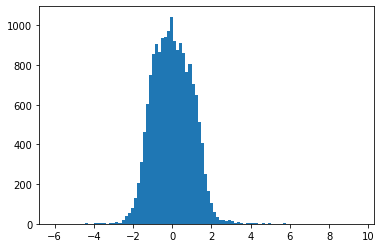

In [126]:

x,y=try_PCA(0.9)
print(x.shape)
scaler = StandardScaler()
print(scaler.fit(x))


x = scaler.transform(x)
plt.hist(x.reshape(-1),bins=100)

In [ ]:
x,y=try_PCA(0.9)
print(x.shape)
scaler = StandardScaler()
print(scaler.fit(x))


x = scaler.transform(x)
plt.hist(x.reshape(-1),bins=100) 

In [ ]:
a = []
def draw_value_dist(x,y, comp_arr=False):
    norm = [StandardScaler(),Normalizer(),MinMaxScaler()]
    title = ["No_norm","StandardScaler","Normalizer","MinMaxScaler"]
    plt.figure(figsize=(10,10))
    
    plt.subplot(2,2,1)
    a.append(plt.hist(x.reshape((-1)),bins=100))
    plt.title(title[0], fontsize=10)
    
    for i,n in enumerate(norm):
        norm_x = n.fit_transform(x.reshape((1,-1)))
        #if comp_arr: print(np.equal(x.reshape(-1),norm_x.reshape(-1)))
        plt.subplot(2,2,i+2)
        a.append(plt.hist(norm_x,bins=100))
        plt.title(title[i+1],fontsize=10)
        
    
    plt.show()

x,y = load_data()
y = y_lable_encode(y)
draw_value_dist(x,y)
        

In [ ]:
draw_value_dist(x,y,True)

In [5]:
plt.hist??

In [15]:
np.array_equal(a[0][0], a[1][0])

True

In [14]:
x,y=load_data()
k = x.reshape((915,-1))

k = ((k - k.min())/(k.max()-k.min()))

(array([1.00000000e+01, 3.90000000e+01, 8.10000000e+01, 9.00000000e+01,
        1.35000000e+02, 2.69000000e+02, 3.37000000e+02, 5.62000000e+02,
        9.18000000e+02, 1.26700000e+03, 1.57700000e+03, 2.16100000e+03,
        2.75100000e+03, 3.38300000e+03, 4.13800000e+03, 5.26400000e+03,
        6.67300000e+03, 8.92100000e+03, 1.12300000e+04, 1.30720000e+04,
        1.57340000e+04, 1.61870000e+04, 1.76760000e+04, 1.94300000e+04,
        2.18250000e+04, 2.56420000e+04, 2.82300000e+04, 3.03340000e+04,
        3.46220000e+04, 3.85310000e+04, 4.50530000e+04, 5.13100000e+04,
        5.32170000e+04, 5.51410000e+04, 5.51230000e+04, 5.58970000e+04,
        5.39390000e+04, 4.83660000e+04, 4.06380000e+04, 3.53840000e+04,
        3.19900000e+04, 3.28730000e+04, 1.12776000e+05, 1.73680253e+08,
        6.91428600e+06, 2.31549000e+05, 4.17261000e+05, 2.43147500e+06,
        4.59088400e+06, 5.83788300e+06, 4.31265700e+06, 2.60129700e+06,
        4.76430100e+06, 9.33493900e+06, 4.54367700e+06, 1.082120

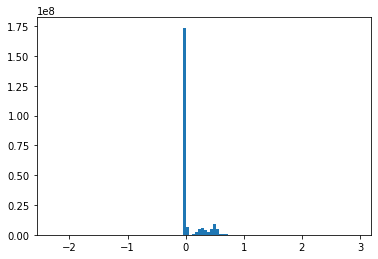

In [15]:
plt.hist(x.reshape(-1),bins=100)

(array([1.00000000e+01, 3.90000000e+01, 8.10000000e+01, 9.00000000e+01,
        1.35000000e+02, 2.69000000e+02, 3.37000000e+02, 5.62000000e+02,
        9.18000000e+02, 1.26700000e+03, 1.57700000e+03, 2.16100000e+03,
        2.75100000e+03, 3.38300000e+03, 4.13800000e+03, 5.26400000e+03,
        6.67300000e+03, 8.92100000e+03, 1.12300000e+04, 1.30720000e+04,
        1.57340000e+04, 1.61870000e+04, 1.76760000e+04, 1.94300000e+04,
        2.18250000e+04, 2.56420000e+04, 2.82300000e+04, 3.03340000e+04,
        3.46220000e+04, 3.85310000e+04, 4.50530000e+04, 5.13100000e+04,
        5.32170000e+04, 5.51410000e+04, 5.51230000e+04, 5.58970000e+04,
        5.39390000e+04, 4.83660000e+04, 4.06380000e+04, 3.53840000e+04,
        3.19900000e+04, 3.28730000e+04, 1.12776000e+05, 1.73680253e+08,
        6.91428600e+06, 2.31549000e+05, 4.17261000e+05, 2.43147500e+06,
        4.59088400e+06, 5.83788300e+06, 4.31265700e+06, 2.60129700e+06,
        4.76430100e+06, 9.33493900e+06, 4.54367700e+06, 1.082120

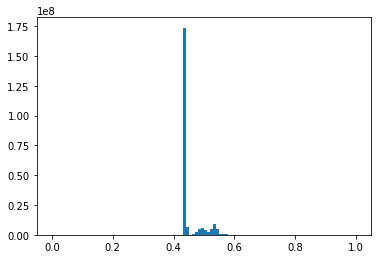

In [18]:
plt.hist(k.reshape(-1),bins=100)

In [65]:
q = np.random.rand(915,19)
model = dnn_model_after_pca(q.shape[1:])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 19)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                640       
_________________________________________________________________
dense_14 (Dense)             (None, 31)                1023      
Total params: 1,663
Trainable params: 1,663
Non-trainable params: 0
_________________________________________________________________


In [66]:
from sklearn.utils import shuffle
q,y = shuffle(q,y)
temp = np.array([])
for i in y:
    #print(np.full((1,19),i))
    temp = np.hstack([temp,np.full((19,),i)])

temp = temp.reshape((y.shape[0],-1))
temp = np.array(temp)
temp = temp/30.
model.fit(temp,y,epochs=10)

Epoch 1/10
29/29 [==============================] - 0s 1ms/step - loss: 3.4319 - accuracy: 0.0295
Epoch 2/10
29/29 [==============================] - 0s 1ms/step - loss: 3.4194 - accuracy: 0.0284
Epoch 3/10
29/29 [==============================] - 0s 1ms/step - loss: 3.4078 - accuracy: 0.0284
Epoch 4/10
29/29 [==============================] - 0s 1ms/step - loss: 3.3976 - accuracy: 0.0230
Epoch 5/10
29/29 [==============================] - 0s 1ms/step - loss: 3.3894 - accuracy: 0.0306
Epoch 6/10
29/29 [==============================] - 0s 1ms/step - loss: 3.3814 - accuracy: 0.0306
Epoch 7/10
29/29 [==============================] - 0s 1ms/step - loss: 3.3740 - accuracy: 0.0306
Epoch 8/10
29/29 [==============================] - 0s 1ms/step - loss: 3.3671 - accuracy: 0.0306
Epoch 9/10
29/29 [==============================] - 0s 1ms/step - loss: 3.3604 - accuracy: 0.0306
Epoch 10/10
29/29 [==============================] - 0s 1ms/step - loss: 3.3539 - accuracy: 0.0306


In [69]:
x,y = try_PCA(0.9)
y = y_lable_encode(y)
x = StandardScaler().fit_transform(x.reshape((y.shape[0],-1)))
x.shape,y.shape

(915, 19)


((915, 19), (915,))

In [70]:
model = dnn_model_after_pca(x.shape[1:])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 19)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                640       
_________________________________________________________________
dense_16 (Dense)             (None, 31)                1023      
Total params: 1,663
Trainable params: 1,663
Non-trainable params: 0
_________________________________________________________________


C:\Users\user\anaconda3\envs\cudatry\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [73]:
x,y = shuffle(x,y)

model.fit(x,y,epochs=1000)

Epoch 1/1000
29/29 [==============================] - 0s 2ms/step - loss: 2.7131 - accuracy: 0.2306
Epoch 2/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.7079 - accuracy: 0.2328
Epoch 3/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.7028 - accuracy: 0.2306
Epoch 4/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.6977 - accuracy: 0.2328
Epoch 5/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.6929 - accuracy: 0.2361
Epoch 6/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.6881 - accuracy: 0.2361
Epoch 7/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.6829 - accuracy: 0.2383
Epoch 8/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.6784 - accuracy: 0.2393
Epoch 9/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.6734 - accuracy: 0.2383
Epoch 10/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.6689 - accuracy: 0.2383

29/29 [==============================] - 0s 1ms/step - loss: 2.4279 - accuracy: 0.2787
Epoch 83/1000
29/29 [==============================] - 0s 2ms/step - loss: 2.4254 - accuracy: 0.2798
Epoch 84/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.4231 - accuracy: 0.2787
Epoch 85/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.4206 - accuracy: 0.2831
Epoch 86/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.4181 - accuracy: 0.2809
Epoch 87/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.4156 - accuracy: 0.2842
Epoch 88/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.4131 - accuracy: 0.2809
Epoch 89/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.4110 - accuracy: 0.2820
Epoch 90/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.4087 - accuracy: 0.2852
Epoch 91/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.4062 - accuracy: 0.2820
Epoc

29/29 [==============================] - 0s 1ms/step - loss: 2.2597 - accuracy: 0.3137
Epoch 163/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.2579 - accuracy: 0.3148
Epoch 164/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.2566 - accuracy: 0.3202
Epoch 165/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.2542 - accuracy: 0.3202
Epoch 166/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.2527 - accuracy: 0.3235
Epoch 167/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.2506 - accuracy: 0.3202
Epoch 168/1000
29/29 [==============================] - 0s 2ms/step - loss: 2.2489 - accuracy: 0.3191
Epoch 169/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.2472 - accuracy: 0.3224
Epoch 170/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.2454 - accuracy: 0.3235
Epoch 171/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.2434 - accuracy: 0.

29/29 [==============================] - 0s 1ms/step - loss: 2.1258 - accuracy: 0.3530
Epoch 243/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.1243 - accuracy: 0.3497
Epoch 244/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.1228 - accuracy: 0.3541
Epoch 245/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.1213 - accuracy: 0.3519
Epoch 246/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.1196 - accuracy: 0.3552
Epoch 247/1000
29/29 [==============================] - 0s 2ms/step - loss: 2.1180 - accuracy: 0.3563
Epoch 248/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.1164 - accuracy: 0.3585
Epoch 249/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.1149 - accuracy: 0.3574
Epoch 250/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.1133 - accuracy: 0.3563
Epoch 251/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.1120 - accuracy: 0.

29/29 [==============================] - 0s 1ms/step - loss: 2.0070 - accuracy: 0.3913
Epoch 323/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.0058 - accuracy: 0.3923
Epoch 324/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.0039 - accuracy: 0.3923
Epoch 325/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.0029 - accuracy: 0.3923
Epoch 326/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.0008 - accuracy: 0.3956
Epoch 327/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.9992 - accuracy: 0.3989
Epoch 328/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.9981 - accuracy: 0.3934
Epoch 329/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.9969 - accuracy: 0.3934
Epoch 330/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.9951 - accuracy: 0.3934
Epoch 331/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.9939 - accuracy: 0.

29/29 [==============================] - 0s 1ms/step - loss: 1.8970 - accuracy: 0.4273
Epoch 403/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.8965 - accuracy: 0.4262
Epoch 404/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.8945 - accuracy: 0.4317
Epoch 405/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.8937 - accuracy: 0.4295
Epoch 406/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.8924 - accuracy: 0.4317
Epoch 407/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.8905 - accuracy: 0.4339
Epoch 408/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.8903 - accuracy: 0.4284
Epoch 409/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.8882 - accuracy: 0.4339
Epoch 410/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.8871 - accuracy: 0.4372
Epoch 411/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.8859 - accuracy: 0.

29/29 [==============================] - 0s 1ms/step - loss: 1.7980 - accuracy: 0.4634
Epoch 483/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.7968 - accuracy: 0.4557
Epoch 484/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.7963 - accuracy: 0.4590
Epoch 485/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.7947 - accuracy: 0.4623
Epoch 486/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.7937 - accuracy: 0.4656
Epoch 487/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.7925 - accuracy: 0.4623
Epoch 488/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.7914 - accuracy: 0.4601
Epoch 489/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.7903 - accuracy: 0.4689
Epoch 490/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.7887 - accuracy: 0.4710
Epoch 491/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.7873 - accuracy: 0.

29/29 [==============================] - 0s 1ms/step - loss: 1.7066 - accuracy: 0.4787
Epoch 563/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.7060 - accuracy: 0.4809
Epoch 564/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.7046 - accuracy: 0.4776
Epoch 565/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.7034 - accuracy: 0.4842
Epoch 566/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.7020 - accuracy: 0.4820
Epoch 567/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.7014 - accuracy: 0.4842
Epoch 568/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.7008 - accuracy: 0.4820
Epoch 569/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.6990 - accuracy: 0.4863
Epoch 570/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.6987 - accuracy: 0.4820
Epoch 571/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.6964 - accuracy: 0.

29/29 [==============================] - 0s 1ms/step - loss: 1.6237 - accuracy: 0.4995
Epoch 643/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.6226 - accuracy: 0.5027
Epoch 644/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.6218 - accuracy: 0.5038
Epoch 645/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.6209 - accuracy: 0.5060
Epoch 646/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.6199 - accuracy: 0.5082
Epoch 647/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.6185 - accuracy: 0.5071
Epoch 648/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.6182 - accuracy: 0.5049
Epoch 649/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.6176 - accuracy: 0.5038
Epoch 650/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.6161 - accuracy: 0.5060
Epoch 651/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.6150 - accuracy: 0.

29/29 [==============================] - 0s 1ms/step - loss: 1.5497 - accuracy: 0.5126
Epoch 723/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.5481 - accuracy: 0.5235
Epoch 724/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.5477 - accuracy: 0.5224
Epoch 725/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.5468 - accuracy: 0.5169
Epoch 726/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.5453 - accuracy: 0.5202
Epoch 727/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.5453 - accuracy: 0.5213
Epoch 728/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.5438 - accuracy: 0.5202
Epoch 729/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.5426 - accuracy: 0.5202
Epoch 730/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.5422 - accuracy: 0.5213
Epoch 731/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.5411 - accuracy: 0.

29/29 [==============================] - 0s 1ms/step - loss: 1.4815 - accuracy: 0.5454
Epoch 803/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.4802 - accuracy: 0.5454
Epoch 804/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.4804 - accuracy: 0.5454
Epoch 805/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.4785 - accuracy: 0.5421
Epoch 806/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.4783 - accuracy: 0.5410
Epoch 807/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.4772 - accuracy: 0.5464
Epoch 808/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.4770 - accuracy: 0.5486
Epoch 809/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.4767 - accuracy: 0.5454
Epoch 810/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.4744 - accuracy: 0.5475
Epoch 811/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.4744 - accuracy: 0.

29/29 [==============================] - 0s 1ms/step - loss: 1.4198 - accuracy: 0.5661
Epoch 883/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.4192 - accuracy: 0.5694
Epoch 884/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.4191 - accuracy: 0.5705
Epoch 885/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.4176 - accuracy: 0.5749
Epoch 886/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.4171 - accuracy: 0.5760
Epoch 887/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.4164 - accuracy: 0.5738
Epoch 888/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.4157 - accuracy: 0.5705
Epoch 889/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.4153 - accuracy: 0.5727
Epoch 890/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.4139 - accuracy: 0.5760
Epoch 891/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.4141 - accuracy: 0.

29/29 [==============================] - 0s 1ms/step - loss: 1.3651 - accuracy: 0.5945
Epoch 963/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.3651 - accuracy: 0.5913
Epoch 964/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.3644 - accuracy: 0.5923
Epoch 965/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.3643 - accuracy: 0.6000
Epoch 966/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.3630 - accuracy: 0.5891
Epoch 967/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.3619 - accuracy: 0.5945
Epoch 968/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.3616 - accuracy: 0.5934
Epoch 969/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.3613 - accuracy: 0.5934
Epoch 970/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.3599 - accuracy: 0.5956
Epoch 971/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.3605 - accuracy: 0.